# Introduction
This notebook analyzes data of a charity (client of AI) and its supporters.  Email broadcast data (sent in March) is given along with supporter transactional data for March, April and May.  The transactional data includes additional transactions that have different broadcasts/campaigns than the email broadcast data sent at the beginning of March.  

by Fred Etter - November, 2019

Here are the **questions given** that are addressed:

1.  Find all unique broadcasts in sends.csv.

    - Use these broadcast identifiers and analyse the transactions data (march.csv,april.csv,may.csv) for each of these broadcasts.  
    
    - Produce summary statistics and figures to represent the numbers/types of transactions for individual broadcasts as well as looking across all broadcasts.

2.  Write a function to identify all transactions and sends received by any given supporter.  

    - Choose a single supporter ID and produce summary statistics (eg. number of emails opened) and figures (plots such as histograms) summarising the supporters activity over the three month period.  

3.  Produce analytics for FCS and FUR activities over the three months of data given.

**Additional questions:**

4.  What happens to emails that do not make the transaction data ?  

    - Is there simply not a response from reporters' email system ? 
    
5.  How many single contributers became recurring contributers ?  

6.  What is the best feature to identify recurring contributers ?

7.  What is the best feature to identify single contributers ?

8.  What are the differences between the non FCS (or FUR) transactions vs. the FCS transactions ?  

9.  Why do all March broadcasts (from sends data) have 'R' and no 'P' ?


#### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Read in the data

In [2]:
df = pd.read_csv('sends.csv', low_memory=False)
df_march = pd.read_csv('march.csv', low_memory=False)
df_april = pd.read_csv('april.csv', low_memory=False)
df_may = pd.read_csv('may.csv', low_memory=False)

# Explore the data

In [3]:
df.head()

,CAMPAIGNER_ID,BROADCAST_ID
0,qMPJbluhCXQ=,158828
1,BDoflNnPHog=,154395
2,BDoflNnPHog=,157751
3,BDoflNnPHog=,158310
4,BDoflNnPHog=,158828


In [4]:
# number of rows and columns
df.shape

(9302069, 2)

In [5]:
# check number of null values
df.isnull().sum().sum()

0

In [6]:
# change culumn names
df.columns = ['cid', 'bid']

#### Unique ID's

In [7]:
a = df.bid.unique()

In [8]:
print(sorted(a))

[154395, 157243, 157563, 157751, 157848, 158308, 158309, 158310, 158311, 158313, 158477, 158822, 158828, 158976, 159076, 159077, 159079, 159219, 159222, 159229, 159328, 159329, 159331, 159888, 160147, 160150, 160353, 160558, 160604, 160975, 161032, 161151, 161581, 161582, 161583, 161584, 161655, 161768, 161951, 162032, 162035, 162036, 162037]


In [9]:
print(len(a))

43


There are **43** unique broadcast ID's.

In [10]:
# print the statistics for BIDs
df.bid.describe()

count    9.302069e+06
mean     1.589158e+05
std      2.499475e+03
min      1.543950e+05
25%      1.577510e+05
50%      1.588280e+05
75%      1.615810e+05
max      1.620370e+05
Name: bid, dtype: float64

In [11]:
# show the number occurrences for each broadcast id in descending order
df.bid.value_counts()

154395    1467098
157751    1438285
158311     695373
161581     640461
162032     622499
160975     366445
158309     353945
159331     335805
161582     315903
162035     290800
158308     275546
161584     269957
159079     262666
162037     248200
158828     175989
159229     156475
158310     146695
161768     140005
157563     137802
159888     137357
161583     132261
159328     127903
162036     121521
159329     117704
159076     100449
159077      95164
160150      29874
160604      11009
160558      11008
158477      10466
158822       9351
157848       9297
158976       9291
160147       9269
161151       9259
161951       9252
158313       2502
160353       2367
157243       2357
161032       2327
161655       1836
159222        223
159219         73
Name: bid, dtype: int64

#### Histogram of broadcast IDs sent in March

Text(0.5, 1.0, 'All broadcasts')

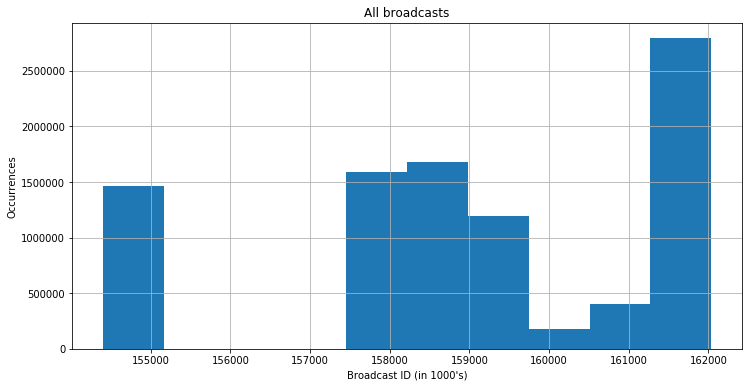

In [12]:
df.bid.hist(figsize=(12, 6))
plt.xlabel("Broadcast ID (in 1000's)")
plt.ylabel('Occurrences')
plt.title('All broadcasts')

In [13]:
# print number of unique campaign ids
len(df.cid.unique())

1603371

There are **1,603,371** unique campaign IDs sent in March.  (This is not transaction data, this is from the sends data in March)

## March transaction data

In [14]:
# sample of 5 rows of data
df_march.sample(5)

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
1379521,CC%2Bt02X9yH6zFWMrHGgntg==,ZA,EBC,2017-03-01 23:22:08,157751,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,134772,NaN,NaN,NaN,NaN,NaN,NaN
632489,%2BGkgt6x6DCOZkArzVWMSmA==,AUS,EBC,2017-03-06 21:10:19,154395,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
1800893,zfGH%2F%2FYrTAuha0eWUOvjsw==,GBR,EBC,2017-03-10 16:19:04,158309,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135339,NaN,NaN,NaN,NaN,NaN,NaN
1293325,RqG9Hgkj0gUUHgIT5m4sfA==,AU,EBC,2017-03-13 21:37:05,154395,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
779203,0EyezaIgT1%2BZkArzVWMSmA==,GB,EBC,2017-03-15 22:28:15,159328,R,open,click,formsub,NaN,...,NaN,NaN,NaN,136356,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# print number of rows and columns for March transactional data
df_march.shape

(1826389, 21)

In [16]:
# print the number of unique broadcast ids in March
m = df_march.ACTIVITY_ID.unique()
print(len(df_march.ACTIVITY_ID.unique()))

1007


In [17]:
# print statistics for March transactional broadcast id data
print(df_march.ACTIVITY_ID.describe())

count    1.826389e+06
mean     1.402132e+05
std      3.912519e+04
min      1.936000e+03
25%      1.543950e+05
50%      1.577510e+05
75%      1.593290e+05
max      1.620370e+05
Name: ACTIVITY_ID, dtype: float64


In [18]:
# create list of broadcast ids that exist in both the sends data and March transactional data
a_int_m = list(set(a).intersection(m))

# print the number of this set
print(len(a_int_m))

43


So, all of the broadcast id's are present in the March transactional data.

#### Histogram of all March broadcast IDs

Text(0.5, 1.0, 'All March transactions')

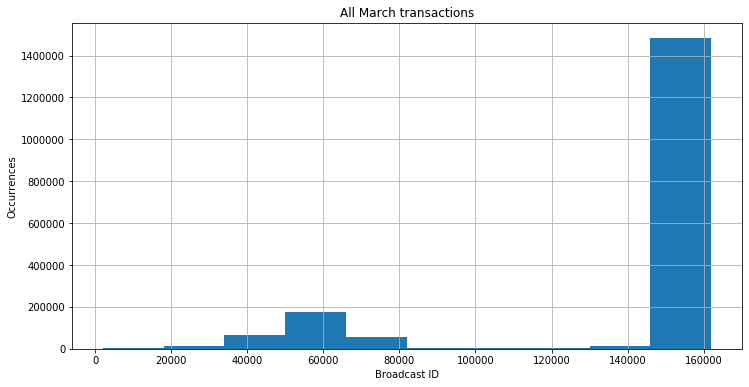

In [19]:
df_march.ACTIVITY_ID.hist(figsize=(12, 6))
plt.xlabel("Broadcast ID")
plt.ylabel('Occurrences')
plt.title('All March transactions')

In [20]:
# Reduce all March transactions to those that include sends BIDs
df_march_cut = df_march.loc[df_march['ACTIVITY_ID'].isin(a)]

#### Histogram of March transaction IDs indcluding only sends BIDs

Text(0.5, 1.0, 'March broadcasts')

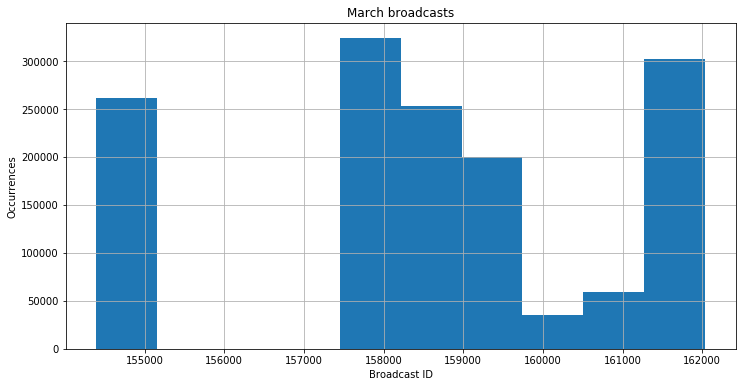

In [21]:
df_march_cut.ACTIVITY_ID.hist(figsize=(12, 6))
plt.xlabel("Broadcast ID")
plt.ylabel('Occurrences')
plt.title('March broadcasts')

In [22]:
# print number of rows and columns of March BIDs from sends data
df_march_cut.shape

(1435793, 21)

In [23]:
# print statistics for March BIDs that are included in sends data
df_march_cut.ACTIVITY_ID.describe()

count    1.435793e+06
mean     1.584793e+05
std      2.407752e+03
min      1.543950e+05
25%      1.577510e+05
50%      1.583110e+05
75%      1.606040e+05
max      1.620370e+05
Name: ACTIVITY_ID, dtype: float64

In [24]:
# sample of 5 rows of the "March_cut" data
df_march_cut.sample(5)

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
1573970,i9R%2Fib1cEJWha0eWUOvjsw==,GB,EBC,2017-03-06 23:10:01,154395,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN
977101,X%2BPnlVoLA3GZkArzVWMSmA==,GB,EBC,2017-03-10 05:07:03,158309,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135339,NaN,NaN,NaN,NaN,NaN,NaN
1680805,rydS6W3NosSBKFlzN0740Q==,BEL,EBC,2017-03-02 02:13:04,157751,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,134772,NaN,NaN,NaN,NaN,NaN,NaN
1822985,WqDLorDFL2%2B15xl1A%2FXc2A==,GB,EBC,2017-03-26 04:30:03,160975,R,NaN,NaN,NaN,hbounce,...,NaN,NaN,NaN,138001,NaN,NaN,NaN,NaN,NaN,NaN
903136,K9wZXOgnRjmZkArzVWMSmA==,GB,EBC,2017-03-09 18:13:13,158309,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,135339,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# adding a "day" column to capture day of the month for later plotting
df_march_cut['day'] = df_march_cut['ACTIVITY_DATETIME'].str.slice(8, 10)
df_march_cut['day'] = pd.to_numeric(df_march_cut.day)

C:\Users\Fred\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fred\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### March supporter actions by day of the month

Text(0.5, 1.0, 'March supporter actions')

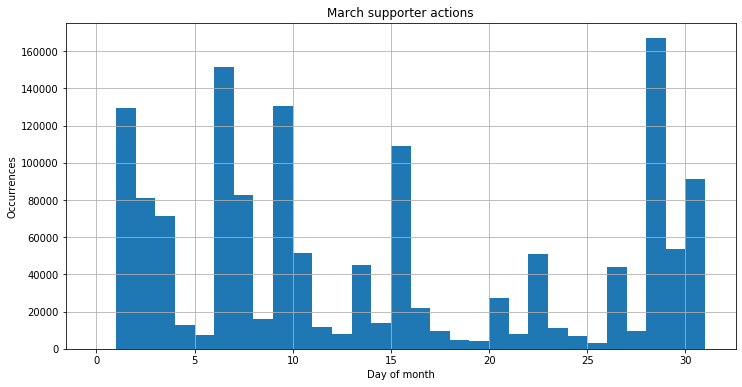

In [26]:
df_march_cut.day.hist(figsize = (12, 6), bins = range(0, 32))
plt.xlabel("Day of month")
plt.ylabel('Occurrences')
plt.title('March supporter actions')

Interestingly, there are a lot of actions that took place towards the end of the month.

## April transaction data

In [27]:
# first 5 rows of April transactions
df_april.head()

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
0,nY8jgGWxUeA=,CA,ETT,2017-04-04 17:02:58,66281,P,Justin,Trudeau,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nY8jgGWxUeA=,CA,ETT,2017-04-03 16:20:54,67130,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5Aia2InAifo=,GBR,ETT,2017-04-06 07:56:55,66281,P,Justin,Trudeau,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kudFmD%2ByF7w=,CAN,ETT,2017-04-04 08:17:15,66281,P,Justin,Trudeau,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nEgT0q6l4MY=,CAN,ETT,2017-04-04 15:34:07,66281,P,Justin,Trudeau,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# number of rows and columns of April transaction data
df_april.shape

(1425965, 21)

In [29]:
# print the number of unique April BIDs
april = df_april.ACTIVITY_ID.unique()
print(len(april))

1006


In [30]:
# April transaction data statistics
print(df_april.ACTIVITY_ID.describe())

count    1.425965e+06
mean     1.408707e+05
std      4.354861e+04
min      7.383000e+03
25%      1.615840e+05
50%      1.629740e+05
75%      1.633120e+05
max      1.666220e+05
Name: ACTIVITY_ID, dtype: float64


In [31]:
# print April ID' common in sends data
a_int_april = list(set(a).intersection(april))
print(len(a_int_april))

42


There is one ID missing.

In [32]:
# find missing ID not in April transactions
set(a) - set(a_int_april)

{159222}

BID **159222** is not in the April transactions.

#### Histogram of all April transactions

Text(0.5, 1.0, 'All April transactions')

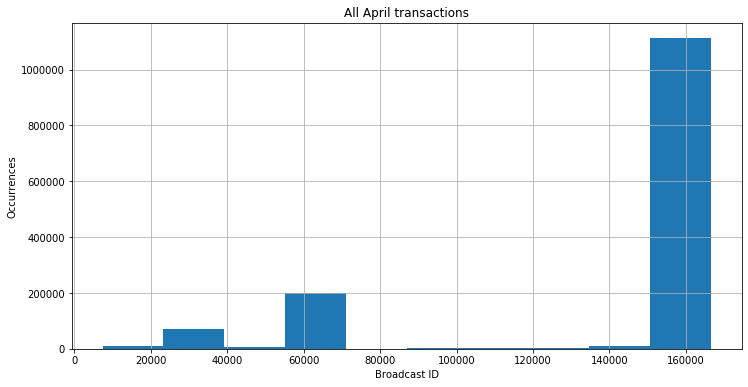

In [33]:
df_april.ACTIVITY_ID.hist(figsize=(12, 6))
plt.xlabel("Broadcast ID")
plt.ylabel('Occurrences')
plt.title('All April transactions')

#### Histogram of April transactions with BID in sends data

Text(0.5, 1.0, 'April broadcasts')

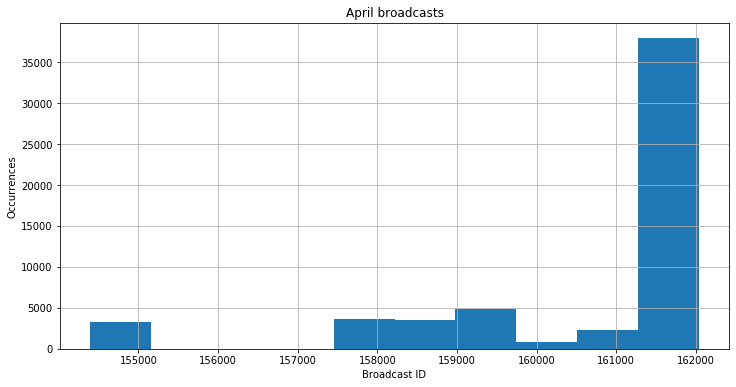

In [34]:
df_april_cut = df_april.loc[df_april['ACTIVITY_ID'].isin(a)]

df_april_cut.ACTIVITY_ID.hist(figsize=(12, 6))
plt.xlabel("Broadcast ID")
plt.ylabel('Occurrences')
plt.title('April broadcasts')

In [35]:
# number of rows and columns for "April_cut"
df_april_cut.shape

(56360, 21)

In [36]:
# April statistical data
df_april_cut.ACTIVITY_ID.describe()

count     56360.000000
mean     160644.224698
std        2083.626385
min      154395.000000
25%      159329.000000
50%      161583.000000
75%      162032.000000
max      162037.000000
Name: ACTIVITY_ID, dtype: float64

In [37]:
# list a sample of 5 rows from April_cut
df_april_cut.sample(5)

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
670546,LNIt1DMf7FqZkArzVWMSmA==,GBR,EBC,2017-04-18 09:19:05,160975,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,138001,NaN,NaN,NaN,NaN,NaN,NaN
657148,4AjrQK4i9gOZkArzVWMSmA==,CO,EBC,2017-04-03 17:13:19,161768,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,138800,NaN,NaN,NaN,NaN,NaN,NaN
524129,%2B2bG59DM2smZkArzVWMSmA==,GBR,EBC,2017-04-10 14:28:01,162035,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,139068,NaN,NaN,NaN,NaN,NaN,NaN
1285028,EMZ%2B3nN%2Bw3CzFWMrHGgntg==,GB,EBC,2017-04-10 15:22:13,162035,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,139068,NaN,NaN,NaN,NaN,NaN,NaN
708843,upXTq5gthSeZkArzVWMSmA==,GB,EBC,2017-04-03 13:52:04,159076,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,136103,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Again, create a day column for April
df_april_cut['day'] = df_april_cut['ACTIVITY_DATETIME'].str.slice(8, 10)
df_april_cut['day'] = pd.to_numeric(df_april_cut.day)

C:\Users\Fred\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Fred\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Histogram of April supporter actions 

Text(0.5, 1.0, 'April supporter actions')

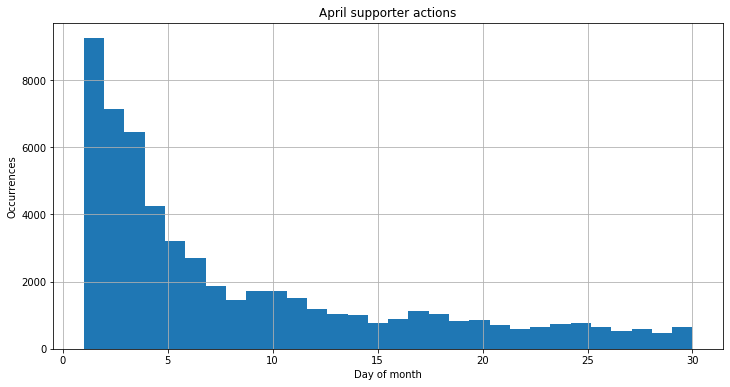

In [39]:
df_april_cut.day.hist(figsize = (12, 6), bins = 30)
plt.xlabel("Day of month")
plt.ylabel('Occurrences')
plt.title('April supporter actions')

This the shape expected; however, March and May have different shapes.  Later, the transaction for 1 specific activity (such as 'open') will be analyzed.

## May transactional data

In [40]:
# sample of 5 rows
df_may.sample(5)

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
27550,OyC4%2BBZTKxiZkArzVWMSmA==,CAN,ETT,2017-05-31 08:17:18,69589,P,Dummy,Target,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654003,pnZe7WRGrwKZkArzVWMSmA==,GB,EBC,2017-05-11 03:37:01,168274,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,145335,NaN,NaN,NaN,NaN,NaN,NaN
844870,qAJzAuiQDUWZkArzVWMSmA==,DE,EBC,2017-05-25 17:25:05,170373,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,147386,NaN,NaN,NaN,NaN,NaN,NaN
270539,G9X1G5yjV3uZkArzVWMSmA==,ESP,EBC,2017-05-17 16:10:07,169319,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,146350,NaN,NaN,NaN,NaN,NaN,NaN
82629,E6oFpXWxjn6ZkArzVWMSmA==,USA,PET,2017-05-04 22:30:42,37410,P,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# shape of all May transactions
df_may.shape

(1682862, 21)

In [42]:
# prin number of unique May IDs
may = df_may.ACTIVITY_ID.unique()
print(len(may))

1002


In [43]:
# May statistics
print(df_may.ACTIVITY_ID.describe())

count    1.682862e+06
mean     1.535763e+05
std      3.837502e+04
min      1.389200e+04
25%      1.674000e+05
50%      1.682740e+05
75%      1.696790e+05
max      1.704660e+05
Name: ACTIVITY_ID, dtype: float64


In [44]:
# get number of May IDs common with sends data
a_int_may = list(set(a).intersection(may))
print(len(a_int_may))

42


In [45]:
# get missing ID
set(a) - set(a_int_may)

{159219}

ID **159219** is missing from May transactional data.

#### Histogram of all May transactions by BID

Text(0.5, 1.0, 'All May transactions')

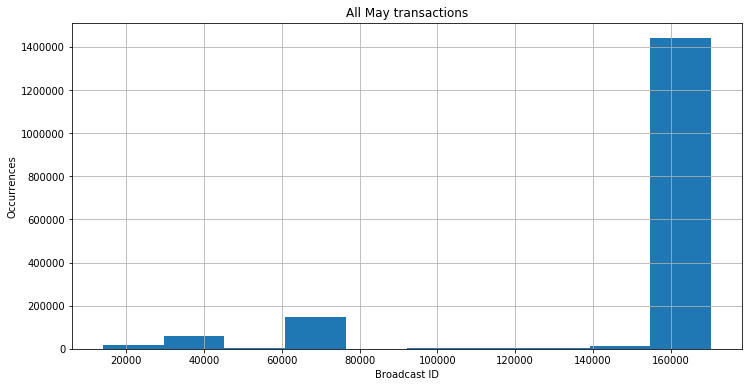

In [46]:
df_may.ACTIVITY_ID.hist(figsize=(12, 6))
plt.xlabel("Broadcast ID")
plt.ylabel('Occurrences')
plt.title('All May transactions')

#### Histogram of May by BID common in sends data

Text(0.5, 1.0, 'May broadcasts')

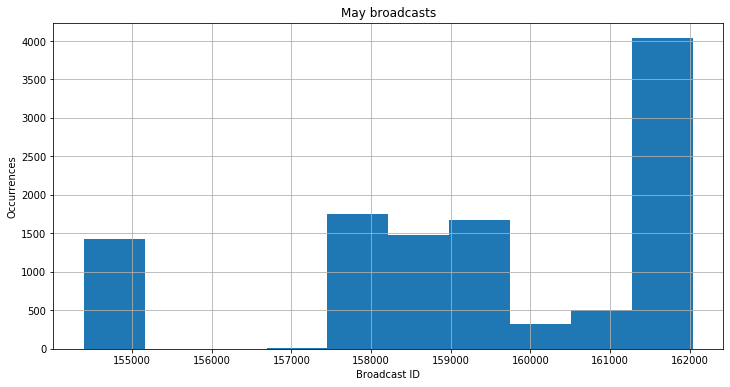

In [47]:
df_may_cut = df_may.loc[df_may['ACTIVITY_ID'].isin(a)]

df_may_cut.ACTIVITY_ID.hist(figsize=(12, 6))
plt.xlabel("Broadcast ID")
plt.ylabel('Occurrences')
plt.title('May broadcasts')

In [48]:
# list shape of "May_cut" data (only BIDs in common in May and sends)
df_may_cut.shape

(11203, 21)

In [49]:
# Stats of May data
df_may_cut.ACTIVITY_ID.describe()

count     11203.000000
mean     159297.519682
std        2438.659385
min      154395.000000
25%      157751.000000
50%      159328.000000
75%      161583.000000
max      162037.000000
Name: ACTIVITY_ID, dtype: float64

In [50]:
# first 5 rows of may IDs common in sends IDs
df_may_cut.head()

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
221338,gfEzSP0HgSM=,CAN,EBC,2017-05-24 13:52:01,159888,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,136916,NaN,NaN,NaN,NaN,NaN,NaN
221488,lYwVO8O9fX4=,CAN,EBC,2017-05-01 01:46:01,161768,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,138800,NaN,NaN,NaN,NaN,NaN,NaN
221489,lYwVO8O9fX4=,CAN,EBC,2017-05-01 01:46:01,162036,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,139069,NaN,NaN,NaN,NaN,NaN,NaN
221560,BhIcQaXnjO4=,CAN,EBC,2017-05-28 17:46:01,159229,R,open,click,formsub,NaN,...,NaN,NaN,NaN,136256,NaN,NaN,NaN,NaN,NaN,NaN
221699,7BF0kVEHgh8=,CA,EBC,2017-05-04 14:49:01,157751,R,open,NaN,NaN,NaN,...,NaN,NaN,NaN,134772,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# checking for FCS data in May_cut
df_may_cut.loc[df_may_cut['ACTIVITY_TYPE'] == 'FCS']

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30


In [52]:
# checking for FUR data in May_cut
df_may_cut.loc[df_may_cut['ACTIVITY_TYPE'] == 'FUR']

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30


In [53]:
# create day column for plotting
df_may_cut['day'] = df_may_cut['ACTIVITY_DATETIME'].str.slice(8, 10)

C:\Users\Fred\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
# check data type for day column
df_may_cut.day.dtypes

dtype('O')

In [55]:
# convert day to numberic
df_may_cut.day = pd.to_numeric(df_may_cut.day)

C:\Users\Fred\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Histogram of May supporter actions by day of month

Text(0.5, 1.0, 'May supporter actions')

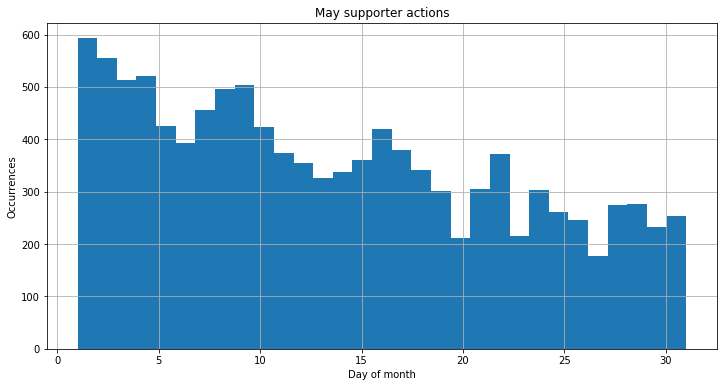

In [56]:
df_may_cut.day.hist(figsize = (12, 6), bins = 31)
plt.xlabel("Day of month")
plt.ylabel('Occurrences')
plt.title('May supporter actions')

The following line graph shows the total campaigns sent in March (9,302,069) and the subsequent actions that supporters took in March, April, and May.

Text(0.5, 1.0, 'Actions by month')

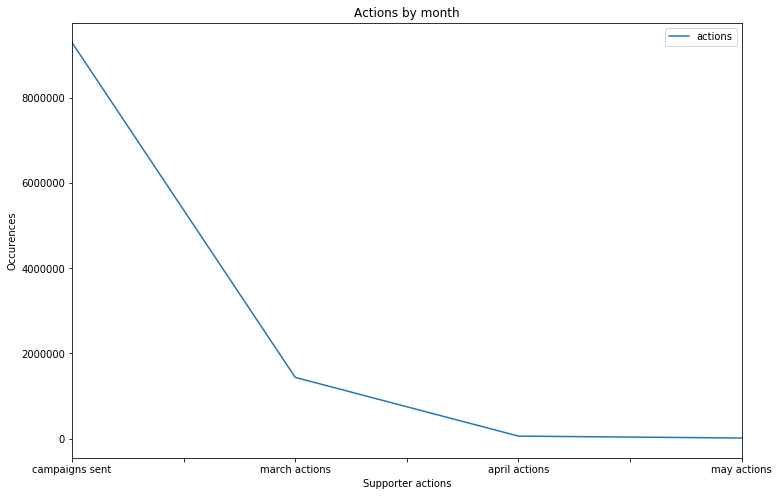

In [57]:
# create the datafram and produce the line chart
df_t = pd.DataFrame({
    'actions': [9302069, 1435793, 56360, 11203]
}, index=['campaigns sent', 'march actions', 'april actions', 'may actions'])
lines = df_t.plot.line(figsize=(12, 8))
lines.set_xlabel("Supporter actions")
lines.set_ylabel("Occurences")
lines.set_title("Actions by month")

As expected, the number of actions supporters took in subsequent months dropped from month to month.

#### Next, building a dataframe to show the number of supporter actions that correspond to each broadcast ID in sends data:

In [58]:
# building a datafram to capture actions taken in each month compared to starting number of broadcasts
df2 = df_march_cut.ACTIVITY_ID.value_counts().to_frame('counts_march')
df3 = df_april_cut.ACTIVITY_ID.value_counts().to_frame('counts_april')
df4 = df_may_cut.ACTIVITY_ID.value_counts().to_frame('counts_may')
df5 = df2.join(df3)
df_temp = pd.concat([df2, df3], axis=1)
df_all = pd.concat([df_temp, df4], axis=1)

In [59]:
# show datafram for actions taken in March, April and May for each BID
df_all.head()

,counts_march,counts_april,counts_may
154395,261808,3293.0,1428.0
157243,256,6.0,4.0
157563,74411,659.0,269.0
157751,246378,2897.0,1429.0
157848,2982,65.0,47.0


In [60]:
# one more concatenation
df_start = df.bid.value_counts().to_frame('counts_start')
df_final = pd.concat([df_all, df_start], axis=1)

# re-arrange columns
df_final = df_final[['counts_start', 'counts_march', 'counts_april', 'counts_may']]

In [61]:
# show 'final' dataframe
df_final.head()

,counts_start,counts_march,counts_april,counts_may
154395,1467098,261808,3293.0,1428.0
157243,2357,256,6.0,4.0
157563,137802,74411,659.0,269.0
157751,1438285,246378,2897.0,1429.0
157848,9297,2982,65.0,47.0


In [62]:
# count all null / nan values
df_final.isnull().sum().sum()

2

This value of 2 makes sense because there was 1 BID in original sends data that was not present in April and another BID not present in May. 

In [63]:
# fill nan's with 0
df_final = df_final.fillna(0)

In [64]:
# calculate 'best_return' by adding all transactions in March, April, May and dividing by total sends
df_final['best_return'] = (df_final.counts_march + df_final.counts_april + df_final.counts_may) / df_final.counts_start*100

In [65]:
# show final dataframe
df_final = df_final.sort_values('best_return', ascending=False)
df_final.head()

,counts_start,counts_march,counts_april,counts_may,best_return
157563,137802,74411,659.0,269.0,54.671921
159222,223,106,0.0,1.0,47.982063
161032,2327,840,32.0,9.0,37.859905
161655,1836,587,37.0,9.0,34.477124
159219,73,24,1.0,0.0,34.246575


So, the above dataframe shows that the BID 157563 had the greatest amount of actions taken by supporters relative to the number of broadcasts orginally sent.  This may not be too useful because an action could be 'moved to spam' and supporters could have performed actions on one BID in March and then again in May.  

The actions need to broken down into each action, such as 'open' to get a clearer picture on the supporter response.  Furthermore, the action of 'formsub' could be something to isolate and understand when and why supporters submitted a form.

In [66]:
# just a spot check on March emails where the supporter 'Participated'
df_march_p = df_march_cut.loc[df_march_cut['ACTIVITY_STATUS'] == 'P']

In [67]:
# number of rows where supporter participated
df_march_p.shape

(0, 22)

No supporters had an activity status of 'P' for March transactions with activity ID in the sends data.

This next dataframe shows some of the actions that were taken for each of the ACTIVITY_DATA_X info and counts the number of actions taken.  

This is just to get a sense of what kind of actions exist for each ACTIVITY_DATA.

In [68]:
# create a dataframe grouped by activity to get a feel for the number and types of activities performed by supporters in March
df_march_cut.fillna('na').groupby(['ACTIVITY_DATA_1', 'ACTIVITY_DATA_2', 'ACTIVITY_DATA_3', 'ACTIVITY_DATA_4', 'ACTIVITY_DATA_5']).ACTIVITY_ID.count().sort_values(ascending=False).reset_index()

,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_ID
0,open,na,na,na,na,1278932
1,open,click,formsub,na,na,94854
2,open,click,na,na,na,47982
3,na,na,na,hbounce,na,8125
4,na,na,na,na,sbounce,2997
5,na,na,na,na,na,2122
6,na,click,formsub,na,na,289
7,na,na,formsub,na,na,241
8,na,click,na,na,na,187
9,open,na,formsub,na,na,34


In [69]:
# create a dataframe grouped by activity to get a feel for the number and types of activities performed by supporters in March
df_march_cut.fillna('na').groupby(['ACTIVITY_DATA_6', 'ACTIVITY_DATA_7', 'ACTIVITY_DATA_8', 'ACTIVITY_DATA_9', 'ACTIVITY_DATA_10']).ACTIVITY_ID.count().sort_values(ascending=False).reset_index().head(10)

,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_ID
0,na,na,na,131397,na,261614
1,na,na,na,134772,na,246209
2,na,na,na,135341,na,82715
3,na,na,na,134585,na,74024
4,na,na,na,138611,na,69566
5,na,na,na,136359,na,56378
6,na,na,na,138001,na,52340
7,na,na,na,135857,na,51781
8,na,na,na,135339,na,49031
9,na,na,na,138612,na,48899


The above dataframe has numbers in ACTIVITY_DATA_9 which needs more investigation.  For instance, 131397 occurred 259,977 times.

In [70]:
df_march.fillna('na').groupby(['ACTIVITY_DATA_1', 'ACTIVITY_DATA_2', 'ACTIVITY_DATA_3', 'ACTIVITY_DATA_4', 'ACTIVITY_DATA_5', 'ACTIVITY_DATA_6', 'ACTIVITY_DATA_7', 'ACTIVITY_DATA_8', 'ACTIVITY_DATA_9', 'ACTIVITY_DATA_10', 'ACTIVITY_DATA_26', 'ACTIVITY_DATA_27', 'ACTIVITY_DATA_28', 'ACTIVITY_DATA_29', 'ACTIVITY_DATA_30']).ACTIVITY_ID.count().sort_values(ascending=False).reset_index().head(50).T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
ACTIVITY_DATA_1,open,open,na,open,Warnel May,open,open,open,open,open,...,open,open,open,open,open,open,open,open,open,open
ACTIVITY_DATA_2,na,na,na,na,Escobar,click,na,na,na,na,...,na,click,na,na,na,na,click,click,click,na
ACTIVITY_DATA_3,na,na,na,na,na,formsub,na,na,na,na,...,na,na,na,na,na,na,na,na,formsub,na
ACTIVITY_DATA_4,na,na,na,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
ACTIVITY_DATA_5,na,na,na,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
ACTIVITY_DATA_6,na,na,na,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
ACTIVITY_DATA_7,na,na,na,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
ACTIVITY_DATA_8,na,na,na,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na
ACTIVITY_DATA_9,134772,131397,na,135341,na,131397,138611,134585,136359,138001,...,132154,131397,137172,134869,138177,136004,136106,135341,133189,138984
ACTIVITY_DATA_10,na,na,na,na,na,na,na,na,na,na,...,na,na,na,na,na,na,na,na,na,na


In [71]:
df_march.head()

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
0,BDoflNnPHog=,CA,ETT,2017-03-07 09:36:52,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kudFmD%2ByF7w=,CAN,ETT,2017-03-06 15:05:34,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,r58OmfDBRm8=,CA,PET,2017-03-02 22:46:26,37410,P,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALJUUgR5fOs=,CAN,ETT,2017-03-20 16:15:17,66158,P,Christy,Clark,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nEgT0q6l4MY=,CAN,ETT,2017-03-06 19:15:09,63955,P,Warnel May,Escobar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Build a dataframe for just the action of 'formsub'

In [72]:
# df_march_cut_o = df_march_cut.drop(df_march_cut[df_march_cut.ACTIVITY_DATA_1 == 'open'].index)
df_march_cut_f = df_march_cut.drop(df_march_cut[df_march_cut.ACTIVITY_DATA_3 != 'formsub'].index)
df_may_cut_f = df_may_cut.drop(df_may_cut[df_may_cut.ACTIVITY_DATA_3 != 'formsub'].index)
df_april_cut_f = df_april_cut.drop(df_april_cut[df_april_cut.ACTIVITY_DATA_3 != 'formsub'].index)

In [73]:
df_march_cut.shape

(1435793, 22)

In [74]:
df_march_cut_f.shape

(95419, 22)

95419 out of 1435793 had a formsub action in March (with sends data BID).  This is 6.6%.

In [75]:
df_march_cut_f.head()

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,day
315531,BDoflNnPHog=,CA,EBC,2017-03-07 09:37:06,154395,R,open,click,formsub,NaN,...,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN,7
315541,kudFmD%2ByF7w=,CAN,EBC,2017-03-06 15:07:12,154395,R,open,click,formsub,NaN,...,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN,6
315556,ALJUUgR5fOs=,CAN,EBC,2017-03-20 10:07:03,159229,R,open,click,formsub,NaN,...,NaN,NaN,136256,NaN,NaN,NaN,NaN,NaN,NaN,20
315561,nEgT0q6l4MY=,CAN,EBC,2017-03-06 16:28:24,154395,R,open,click,formsub,NaN,...,NaN,NaN,131397,NaN,NaN,NaN,NaN,NaN,NaN,6
315566,nEgT0q6l4MY=,CAN,EBC,2017-03-20 12:40:05,159229,R,open,click,formsub,NaN,...,NaN,NaN,136256,NaN,NaN,NaN,NaN,NaN,NaN,20


In [76]:
df2_f = df_march_cut_f.ACTIVITY_ID.value_counts().to_frame('countf_march')
df3_f = df_april_cut_f.ACTIVITY_ID.value_counts().to_frame('countf_april')
df4_f = df_may_cut_f.ACTIVITY_ID.value_counts().to_frame('countf_may')
df5_f = df2_f.join(df3_f)
df_temp_f = pd.concat([df2_f, df3_f], axis=1)
df_all_f = pd.concat([df_temp_f, df4_f], axis=1)

In [77]:
# one more concatenation
df_start_f = df.bid.value_counts().to_frame('countf_start')
df_final_f = pd.concat([df_all_f, df_start_f], axis=1)

# re-arrange columns
df_final_f = df_final_f[['countf_start', 'countf_march', 'countf_april', 'countf_may']]

In [78]:
df_final_f.head()

,countf_start,countf_march,countf_april,countf_may
154395,1467098,71860.0,511.0,8.0
157243,2357,NaN,NaN,NaN
157563,137802,472.0,3.0,4.0
157751,1438285,NaN,NaN,NaN
157848,9297,3.0,NaN,NaN


The above dataframe counts all of the 'formsub' actions in March, April and May.  It also contains the original number of broadcasts sent in March by Activity_ID.

In [79]:
# fill nans with
df_final_f = df_final_f.fillna(0)

# calculate 'best_return' by adding all transactions in March, April, May and dividing by total sends
df_final_f['best_return_f'] = (df_final_f.countf_march + df_final_f.countf_april + df_final_f.countf_may) / df_final_f.countf_start*100

# sprt final dataframe
df_final_f = df_final_f.sort_values('best_return_f', ascending=False)

In [80]:
df_final_f.head(10)

,countf_start,countf_march,countf_april,countf_may,best_return_f
159229,156475,10025.0,200.0,33.0,6.555680
159888,137357,7224.0,100.0,17.0,5.344467
154395,1467098,71860.0,511.0,8.0,4.933481
158313,2502,95.0,0.0,0.0,3.796962
158477,10466,376.0,11.0,0.0,3.697688
161655,1836,18.0,1.0,0.0,1.034858
159328,127903,515.0,6.0,0.0,0.407340
157563,137802,472.0,3.0,4.0,0.347600
159331,335805,907.0,13.0,5.0,0.275457
161768,140005,329.0,29.0,1.0,0.256419


This is probably starting to get more useful.  So, BID 159229 has had a **6.6%** rate of 'formsub' - which is assumed to meen submitting a form which is probably a good thing for the compaign / broadcast.  

The above dataframe only includes BIDs from the original sends data.

In [81]:
df_final_f.tail(10)

,countf_start,countf_march,countf_april,countf_may,best_return_f
160975,366445,0.0,0.0,0.0,0.0
161032,2327,0.0,0.0,0.0,0.0
161151,9259,0.0,0.0,0.0,0.0
160147,9269,0.0,0.0,0.0,0.0
157243,2357,0.0,0.0,0.0,0.0
159222,223,0.0,0.0,0.0,0.0
159219,73,0.0,0.0,0.0,0.0
157751,1438285,0.0,0.0,0.0,0.0
161951,9252,0.0,0.0,0.0,0.0
158822,9351,0.0,0.0,0.0,0.0


The above campaigns appear to be the weakest as they have the lowest percentage of 'formsubs' throughout the 3 month period.

#### Histogram of 'formsub' actions as a percentage of original Broadcast

Text(0.5, 1.0, 'Formsub supporter actions')

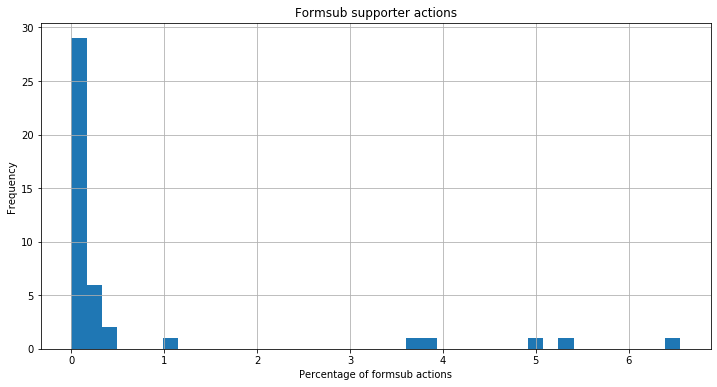

In [82]:
df_final_f.best_return_f.hist(figsize = (12, 6), bins = 40)
plt.xlabel("Percentage of formsub actions")
plt.ylabel('Frequency')
plt.title('Formsub supporter actions')

Most broadcasts are getting a 'formsub' in the 0 to .5 percent range.  However, there are some broadcasts that are getting as high as over 6%.  

Does a formsub meen that a contribution has been made or will be made in the future ?  (Question for Gordon)

In [83]:
# formsub statistics
df_final_f.best_return_f.describe()

count    43.000000
mean      0.659160
std       1.596185
min       0.000000
25%       0.005382
50%       0.045417
75%       0.211881
max       6.555680
Name: best_return_f, dtype: float64

So, the average rate of a 'formsub' action by a supporter across all months is about 0.66% for the BIDs in the sends data.

There are no 'FCS' or 'FUR' activity types in the transactions data for the Broadcasts in the sends data, so these types will have to be analyzed using other Broadcasts that presumably happened before March.

#### Histogram of 'formsub' by day of month

In [84]:
# create day column for plotting
df_march_cut_f['day'] = df_march_cut_f['ACTIVITY_DATETIME'].str.slice(8, 10)

In [85]:
# convert day to numberic
df_march_cut_f.day = pd.to_numeric(df_march_cut_f.day)

Text(0.5, 1.0, 'March supporter formsub actions')

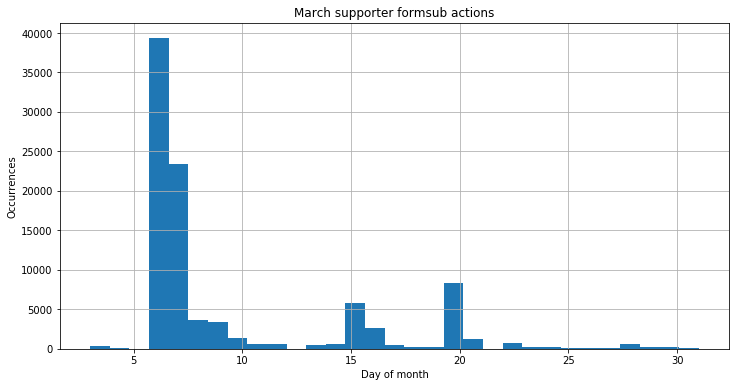

In [86]:
df_march_cut_f.day.hist(figsize = (12, 6), bins = 31)
plt.xlabel("Day of month")
plt.ylabel('Occurrences')
plt.title('March supporter formsub actions')

This is interesting because there are jumps in the histogram.  A smoother curve is expected...  unless the sends data in March were not all sent at the beginning of March (which they weren't).  In order to get a smoother curve, the sent date needs to be subtracted from the 'formsub' action date.  This is performed below.  Also all of the months are combined to look at 'formsub' occurrences from the beginning of March to the end of May.

In [87]:
# create day column for plotting
df_april_cut_f['day'] = df_april_cut_f['ACTIVITY_DATETIME'].str.slice(8, 10)

# convert day to numberic
df_april_cut_f.day = pd.to_numeric(df_april_cut_f.day)

Text(0.5, 1.0, 'April supporter formsub actions')

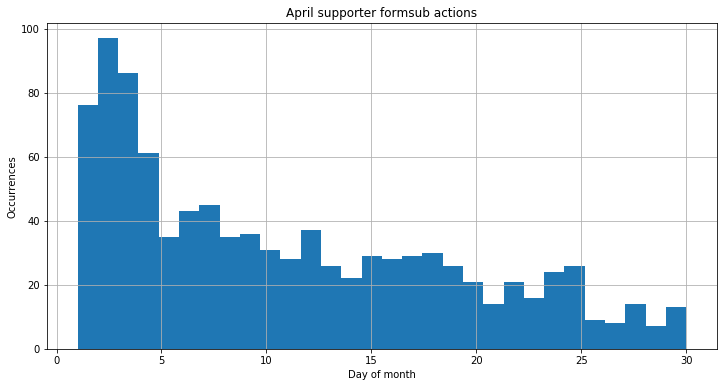

In [88]:
df_april_cut_f.day.hist(figsize = (12, 6), bins = 30)
plt.xlabel("Day of month")
plt.ylabel('Occurrences')
plt.title('April supporter formsub actions')

In [89]:
# create day column for plotting
df_may_cut_f['day'] = df_may_cut_f['ACTIVITY_DATETIME'].str.slice(8, 10)

# convert day to numberic
df_may_cut_f.day = pd.to_numeric(df_may_cut_f.day)

Text(0.5, 1.0, 'May supporter formsub actions')

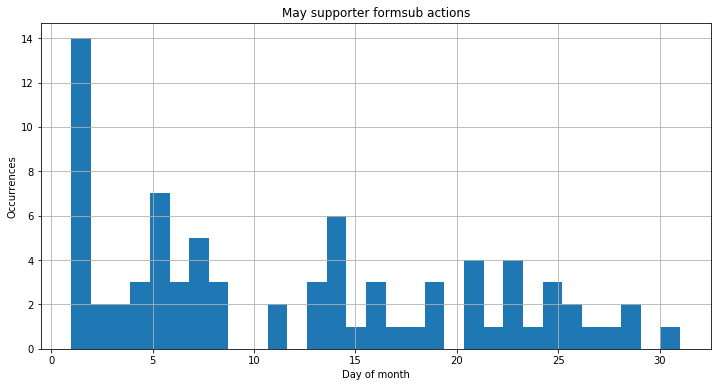

In [90]:
df_may_cut_f.day.hist(figsize = (12, 6), bins = 31)
plt.xlabel("Day of month")
plt.ylabel('Occurrences')
plt.title('May supporter formsub actions')

In [91]:
# This series of actions creates a dataframe that lists the beginning time (t_zero) for each Broadcast along with the 
# total number of actions for each March Broadcast.

df_march_first = (
    df_march
    .sort_values('ACTIVITY_DATETIME')
    .groupby('ACTIVITY_ID')
    .first()
    .reset_index()[['ACTIVITY_ID', 'ACTIVITY_DATETIME']]
)

df_march_first.columns = ['ACTIVITY_ID', 't_zero']

df_march_count = (
    df_march
    .ACTIVITY_ID
    .value_counts()
    .reset_index()
)

df_march_count.columns = ['ACTIVITY_ID', 'n_actions']
df_march_summ = df_march_first.merge(df_march_count, how='outer', on='ACTIVITY_ID')
df_march_summ = df_march_summ[df_march_summ.ACTIVITY_ID.isin(df.bid.values)]
df_march_summ.head(10)

,ACTIVITY_ID,t_zero,n_actions
947,154395,2017-03-06 15:04:00,261808
965,157243,2017-03-03 06:04:11,256
966,157563,2017-03-03 06:04:00,74411
967,157751,2017-03-01 16:04:00,246378
968,157848,2017-03-03 07:04:00,2982
969,158308,2017-03-09 14:37:00,39420
970,158309,2017-03-09 13:10:00,49714
971,158310,2017-03-09 14:52:00,21394
972,158311,2017-03-09 15:01:00,84166
973,158313,2017-03-09 12:55:00,756


In [92]:
# converting t_zero to an integer
df_march_summ['t_zero'] = df_march_summ['t_zero'].str.slice(8, 10)
df_march_summ['t_zero'] = pd.to_numeric(df_march_summ.t_zero)

In [93]:
df_march_summ.head()

,ACTIVITY_ID,t_zero,n_actions
947,154395,6,261808
965,157243,3,256
966,157563,3,74411
967,157751,1,246378
968,157848,3,2982


In [94]:
# add days in April and May to account for the start time of day 0 on March 1st
df_april_cut_f['day'] = df_april_cut_f['day'] + 31
df_may_cut_f['day'] = df_may_cut_f['day'] + 61

In [95]:
# merge march data with march_summ to subtract t_zero later
df_march_zero = df_march_cut_f.merge(df_march_summ, how = 'inner', on = 'ACTIVITY_ID')

In [96]:
df_march_zero.head()

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,day,t_zero,n_actions
0,BDoflNnPHog=,CA,EBC,2017-03-07 09:37:06,154395,R,open,click,formsub,NaN,...,131397,NaN,NaN,NaN,NaN,NaN,NaN,7,6,261808
1,kudFmD%2ByF7w=,CAN,EBC,2017-03-06 15:07:12,154395,R,open,click,formsub,NaN,...,131397,NaN,NaN,NaN,NaN,NaN,NaN,6,6,261808
2,nEgT0q6l4MY=,CAN,EBC,2017-03-06 16:28:24,154395,R,open,click,formsub,NaN,...,131397,NaN,NaN,NaN,NaN,NaN,NaN,6,6,261808
3,MpbERpuNCk0=,CA,EBC,2017-03-06 15:04:01,154395,R,open,click,formsub,NaN,...,131397,NaN,NaN,NaN,NaN,NaN,NaN,6,6,261808
4,yWg1o0ksoTw=,CA,EBC,2017-03-06 15:34:00,154395,R,open,click,formsub,NaN,...,131397,NaN,NaN,NaN,NaN,NaN,NaN,6,6,261808


#### Plot of March days where a 'formsub' action occurred

Text(0.5, 1.0, 'March transactions formsub actions')

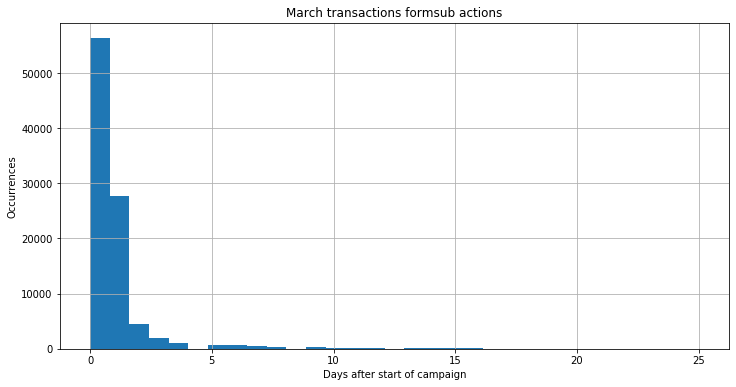

In [97]:
(df_march_zero.day - df_march_zero.t_zero).hist(figsize = (12, 6), bins = 31)
plt.xlabel("Days after start of campaign")
plt.ylabel('Occurrences')
plt.title('March transactions formsub actions')

#### Below is the histogram on log scale for March 'formsub' actions

Text(0.5, 1.0, 'March transactions formsub actions')

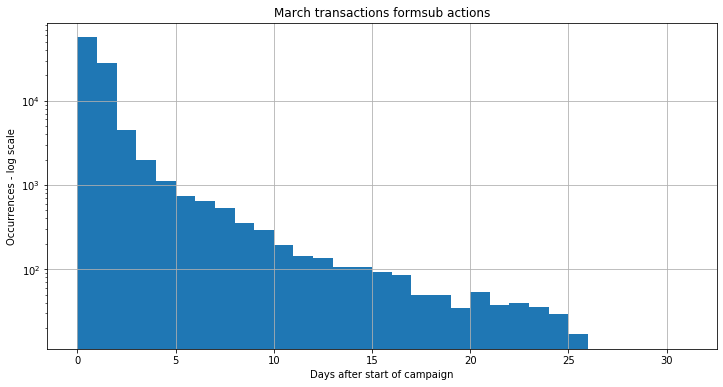

In [98]:
(df_march_zero.day - df_march_zero.t_zero).hist(figsize = (12, 6), bins = range(0, 32), log=True)
plt.xlabel("Days after start of campaign")
plt.ylabel('Occurrences - log scale')
plt.title('March transactions formsub actions')

In [99]:
# merging April and May data into March to look at all of the formsubs actions across all 3 months
df_april_zero = df_april_cut_f.merge(df_march_summ, how = 'inner', on = 'ACTIVITY_ID')
df_may_zero = df_may_cut_f.merge(df_march_summ, how = 'inner', on = 'ACTIVITY_ID')

# add April and May dataframe to March
df_zero = pd.concat([df_march_zero, df_april_zero])
df_zero_all = pd.concat([df_zero, df_may_zero])

#### Histogram of 'formsubs' across all 3 months on log scale

Text(0.5, 1.0, 'All supporter formsub actions')

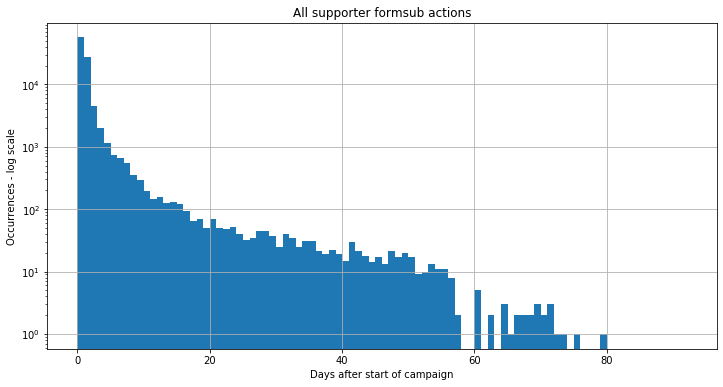

In [100]:
# subtracting t_zero from the day where the formsubs occur and show histogram
(df_zero_all.day - df_zero_all.t_zero).hist(figsize = (12, 6), bins = range(0, 93), log=True)
plt.xlabel("Days after start of campaign")
plt.ylabel('Occurrences - log scale')
plt.title('All supporter formsub actions')

The above histogram is what one would expect:  the number of 'formsub' actions logorithmically decreases from the initially sends data to the end of May.  **This shows that there were are very large proportion of 'formsub' actions that happened early in the lifecycle of the compaign**.

In [101]:
# just checking all rows in march, april, may is equal to number of rows in 'df_zero_all' (yes they are equal)
print(df_zero_all.shape)
print(df_march_zero.shape)
print(df_april_zero.shape)
print(df_may_zero.shape)

(96471, 24)
(95419, 24)
(973, 24)
(79, 24)


In [102]:
# get a quick look on the number of 'formsubs' by country
df_march_cut_f.groupby(['COUNTRY']).count().sort_values('ACTIVITY_DATA_3', ascending=False).head(10)

,SUPPORTER_ID,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,...,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,day
COUNTRY,,,,,,,,,,,,,,,,,,,,,
CA,13754,13754,13754,13754,13754,13673,13722,13754,0,0,...,0,0,13754,0,0,0,0,0,0,13754
USA,12597,12597,12597,12597,12597,12526,12560,12597,0,1,...,0,0,12597,0,0,0,0,0,0,12597
GBR,11326,11326,11326,11326,11326,11255,11291,11326,0,0,...,0,0,11326,0,0,0,0,0,0,11326
US,11177,11177,11177,11177,11177,11111,11137,11177,0,0,...,1,0,11177,0,0,0,0,0,0,11177
CAN,11030,11030,11030,11030,11030,10959,10996,11030,0,0,...,0,0,11030,0,0,0,0,0,0,11030
GB,7590,7590,7590,7590,7590,7547,7562,7590,0,0,...,1,0,7590,0,0,0,0,0,0,7590
DEU,1805,1805,1805,1805,1805,1797,1802,1805,0,0,...,0,0,1805,0,0,0,0,0,0,1805
AUS,1797,1797,1797,1797,1797,1786,1791,1797,0,0,...,0,0,1797,0,0,0,0,0,0,1797
ITA,1710,1710,1710,1710,1710,1701,1703,1710,0,0,...,0,0,1710,0,0,0,0,0,0,1710


Canada has the most 'formsubs', followed by USA and then GBR.

# Function for each supporter

first, create a dataframe with the March, April and May transactions that only include the Broadcast / Activity IDs from the sends data.

In [103]:
# concatenate 3 transactional data frames
df_t1 = pd.concat([df_march_cut, df_april_cut])
df_t = pd.concat([df_t1, df_may_cut])

In [104]:
# to identify all transactions and sends received by any given supporter.
# count R's, P's and open's, etc

def supporter(supporter_id):
    df_sup = df_t.loc[df_t['SUPPORTER_ID'] == supporter_id]
    
    hb = np.sum(df_sup['ACTIVITY_DATA_4'] == 'hbounce')
    sb = np.sum(df_sup['ACTIVITY_DATA_5'] == 'sbounce')
    R = np.sum(df_sup['ACTIVITY_STATUS'] == 'R')
    O = np.sum(df_sup['ACTIVITY_DATA_1'] == 'open')
    click = np.sum(df_sup['ACTIVITY_DATA_2'] == 'click')
    P = np.sum(df_sup['ACTIVITY_STATUS'] == 'P')
    formsub = np.sum(df_sup['ACTIVITY_DATA_3'] == 'formsub')
    single = np.sum(df_sup['ACTIVITY_TYPE'] == 'FCS')
    monthly = np.sum(df_sup['ACTIVITY_TYPE'] == 'FUR')

    print('This supporter:')
    print('\tHard Bounced %d Broadcasts' %(hb))
    print('\tSoft Bounced %d Broadcasts' %(sb))
    print('\tReceived %d Broadcasts' %(R))
    print('\tOpened %d Broadcasts' %(O))
    print('\tClicked in %d Broadcasts' %(click))
    print('\tParticipated in %d Broadcasts' %(P))
    print('\tSubmitted a form in %d Broadcasts' %(formsub))
    print('\tSingle donation %d times' %(single))
    print('\tRecurring donation %d times' %(monthly))  
    
    # set up the bar plot
    actions = [hb, sb, R, O, click, P, formsub, single, monthly]
    index = ['hb', 'sb', 'R', 'open', 'click', 'P', 'formsub', 'single', 'monthly']
    df = pd.DataFrame({'actions': actions}, index=index)
    ax = df.plot.bar(rot=0, figsize=(12, 6))
    plt.xlabel("Action")
    plt.ylabel('Occurrences')
    plt.title("Supporter '%s' actions (March BIDs only)" %(supporter_id))

This supporter:
	Hard Bounced 0 Broadcasts
	Soft Bounced 0 Broadcasts
	Received 10 Broadcasts
	Opened 10 Broadcasts
	Clicked in 2 Broadcasts
	Participated in 0 Broadcasts
	Submitted a form in 1 Broadcasts
	Single donation 0 times
	Recurring donation 0 times


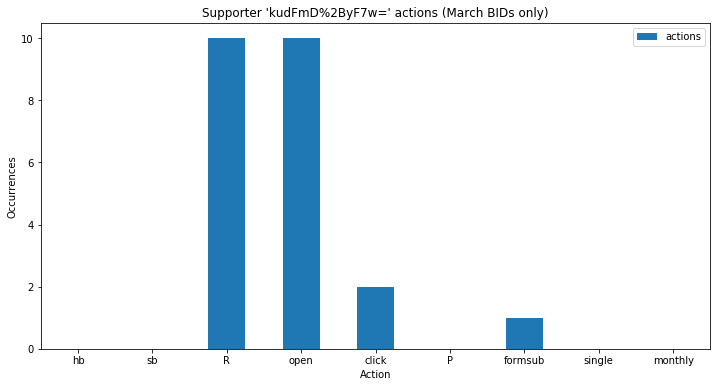

In [105]:
# execute the function with a sample supporter.  Remember these only include Activity IDs in sends data.
supporter('kudFmD%2ByF7w=')    

#### Barplot of significant activities for all supporters

Text(0.5, 1.0, 'Supporter actions for all 3 months (March BIDs only)')

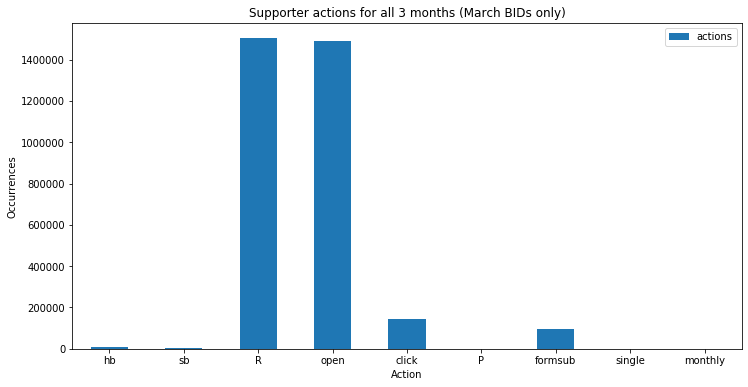

In [106]:
    hb = np.sum(df_t['ACTIVITY_DATA_4'] == 'hbounce')
    sb = np.sum(df_t['ACTIVITY_DATA_5'] == 'sbounce')
    R = np.sum(df_t['ACTIVITY_STATUS'] == 'R')
    O = np.sum(df_t['ACTIVITY_DATA_1'] == 'open')
    click = np.sum(df_t['ACTIVITY_DATA_2'] == 'click')
    P = np.sum(df_t['ACTIVITY_STATUS'] == 'P')
    formsub = np.sum(df_t['ACTIVITY_DATA_3'] == 'formsub')
    single = np.sum(df_t['ACTIVITY_TYPE'] == 'FCS')
    monthly = np.sum(df_t['ACTIVITY_TYPE'] == 'FUR')

# set up bar plot
actions = [hb, sb, R, O, click, P, formsub, single, monthly]
index = ['hb', 'sb', 'R', 'open', 'click', 'P', 'formsub', 'single', 'monthly']
df = pd.DataFrame({'actions': actions}, index=index)
ax = df.plot.bar(rot=0, figsize=(12, 6))
plt.xlabel("Action")
plt.ylabel('Occurrences')
plt.title('Supporter actions for all 3 months (March BIDs only)')

# FCS and FUR  

First, check to see if there are any of these occurrences in the March Broadcast_ID's.

In [107]:
# show all columns
pd.set_option('display.max_columns', None)
# create dataframes for just fcs and fur transactions in March
df_fcs_march = df_march.loc[df_march['ACTIVITY_TYPE'] == 'FCS']
df_fur_march = df_march.loc[df_march['ACTIVITY_TYPE'] == 'FUR']

In [108]:
# there were 12107 fcs transactions in March
df_fcs_march.shape

(12107, 21)

In [109]:
# there were 96 fur transactions in March
df_fur_march.shape

(96, 21)

In [110]:
# percentage of FUR to FCS in March
96/(12107 + 96)

0.00786691797099074

In [111]:
# March "cut"
df_fcs_march_cut = df_march_cut.loc[df_march_cut['ACTIVITY_TYPE'] == 'FCS']
df_fur_march_cut = df_march_cut.loc[df_march_cut['ACTIVITY_TYPE'] == 'FUR']

In [112]:
# there were no fcs transactions in March for broadcast IDs from sends data
df_fcs_march_cut.shape

(0, 22)

In [113]:
# there were no fur transactions in March for broadcast IDs from sends data
df_fur_march_cut.shape

(0, 22)

In [114]:
# April
df_fcs_april = df_april.loc[df_april['ACTIVITY_TYPE'] == 'FCS']
df_fur_april = df_april.loc[df_april['ACTIVITY_TYPE'] == 'FUR']

df_fcs_april_cut = df_april_cut.loc[df_april_cut['ACTIVITY_TYPE'] == 'FCS']
df_fur_april_cut = df_april_cut.loc[df_april_cut['ACTIVITY_TYPE'] == 'FUR']

In [115]:
df_fcs_april.shape

(5013, 21)

In [116]:
df_fur_april.shape

(29, 21)

There were 5013 fcs transactions in April and 29 FUR transactions in April.  This is about 0.6% fur to fcs in April.

In [117]:
# April FUR to FCS
29/(5013 + 29)

0.005751685838952796

In [118]:
df_fcs_april_cut.shape

(0, 22)

In [119]:
df_fur_april_cut.shape

(0, 22)

As shown in the 2 cells above, there were no fcs or fur transactions in April for the BIDs in the sends data.

In [120]:
# May

df_fcs_may = df_may.loc[df_may['ACTIVITY_TYPE'] == 'FCS']
df_fur_may = df_may.loc[df_may['ACTIVITY_TYPE'] == 'FUR']

df_fcs_may_cut = df_may_cut.loc[df_may_cut['ACTIVITY_TYPE'] == 'FCS']
df_fur_may_cut = df_may_cut.loc[df_may_cut['ACTIVITY_TYPE'] == 'FUR']

In [121]:
df_fcs_may.shape

(9851, 21)

In [122]:
df_fur_may.shape

(63, 21)

There were 9851 fcs transactions in May and 63 fur transactions in May.  This is about 0.6%.

In [123]:
63/(9851 + 63)

0.006354649989913254

In [124]:
df_fcs_may_cut.shape

(0, 22)

In [125]:
df_fur_may_cut.shape

(0, 22)

There are no FCS or FUR activities in the March (sends) Broadcasts, so all Broadcast_IDs will be considered in this section.

In [126]:
df_march.loc[df_march['ACTIVITY_STATUS'] == 'R'].shape

(1511078, 21)

In [127]:
df_march.loc[df_march['ACTIVITY_STATUS'] == 'P'].shape

(295511, 21)

The following bar plot shows the number of R actions relative to P supporter actions.

Text(0.5, 1.0, 'R vs P actions')

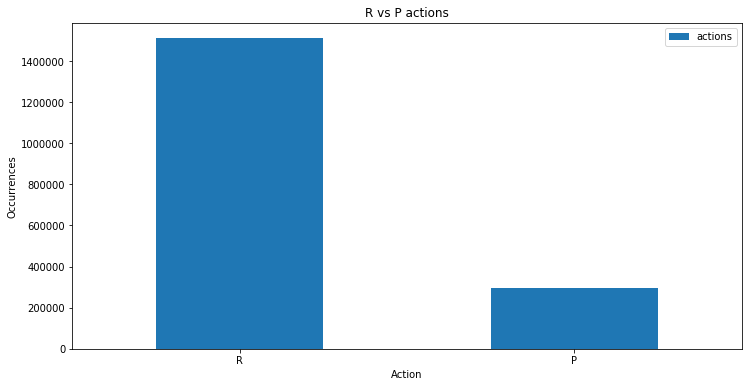

In [128]:
# set up the bar plot
actions = [1511078, 295511]
index = ['R', 'P']
df = pd.DataFrame({'actions': actions}, index=index)
ax = df.plot.bar(rot=0, figsize=(12, 6))
plt.xlabel("Action")
plt.ylabel('Occurrences')
plt.title("R vs P actions")

#### Set up another bar plot for FCS vs FUR transactions:

In [129]:
df_t1_all = pd.concat([df_march, df_april], sort=False)
df_t_all = pd.concat([df_t1_all, df_may], sort=False)

In [130]:
df_t_all.shape

(4935216, 21)

In [131]:
print(df_t_all.loc[df_t_all['ACTIVITY_TYPE'] == 'FCS'].shape)
print(df_t_all.loc[df_t_all['ACTIVITY_TYPE'] == 'FUR'].shape)

(26971, 21)
(188, 21)


Text(0.5, 1.0, 'All transactions vs. FCS vs FUR')

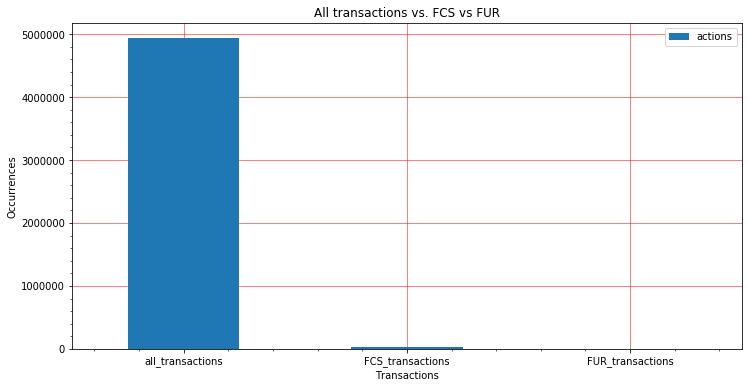

In [132]:
actions = [4935216, 26971, 188]
index = ['all_transactions', 'FCS_transactions', 'FUR_transactions']
df = pd.DataFrame({'actions': actions}, index=index)
ax = df.plot.bar(rot=0, figsize=(12, 6))
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.xlabel("Transactions")
plt.ylabel('Occurrences')
plt.title("All transactions vs. FCS vs FUR")

Text(0.5, 1.0, 'All transactions vs. FCS vs FUR')

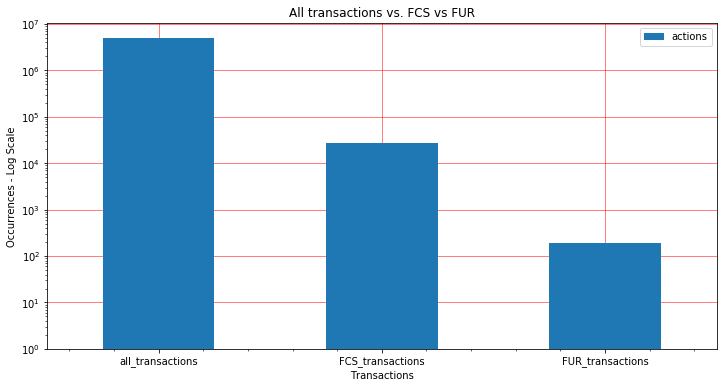

In [133]:
# same as above, except log scale:
actions = [4935216, 26971, 188]
index = ['all_transactions', 'FCS_transactions', 'FUR_transactions']
df = pd.DataFrame({'actions': actions}, index=index)
ax = df.plot.bar(rot=0, figsize=(12, 6), log=True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.xlabel("Transactions")
plt.ylabel('Occurrences - Log Scale')
plt.title("All transactions vs. FCS vs FUR")

Description of columns for all of the transactional data:

    - SUPORTER_ID:  alphanumeric identifier
    - COUNTRY:  country
    - ACTIVITY TYPE:  EBC, ETT, FCS, FUR for example
    - ACTIVITY_DATETIME:  date and time
    - ACTIVITY_ID:  Broadcast ID
    - ACTIVITY_STATUS:  R, P, success, reject
    - ACTIVITY_DATA_1:  open, Dummy, (persons name), number such as 6834763
    - ACTIVITY_DATA_2:  click, Target, (persons name), alphanumeric such as ND8358874172174
    - ACTIVITY_DATA_3:  formsub, Error Msg
    - ACTIVITY_DATA_4:  hbounce, amount of donation? (5.0)
    - ACTIVITY_DATA_5:  sbounce, currency
    - ACTIVITY_DATA_6:  payment type
    - ACTIVITY_DATA_7:  R, S, amount (15)
    - ACTIVITY_DATA_8:  number
    - ACTIVITY_DATA_9:  number (131397), 1
    - ACTIVITY_DATA_10:  ACTIVE, SUSPENDED
    - ACTIVITY_DATA_26:  number
    - ACTIVITY_DATA_27:  number
    - ACTIVITY_DATA_28:  number
    - ACTIVITY_DATA_29:  number
    - ACTIVITY_DATA_30:  number
    

The following function is for all transactions across all 3 months - Not just for broadcast IDs from sends data:

In [134]:
# to identify all transactions and sends received by any given supporter.
# count R's, P's and open's, etc for all transactions (not just from sends BIDs)

def supporter(supporter_id):
    df_sup = df_t_all.loc[df_t_all['SUPPORTER_ID'] == supporter_id]
    
    hb = np.sum(df_sup['ACTIVITY_DATA_4'] == 'hbounce')
    sb = np.sum(df_sup['ACTIVITY_DATA_5'] == 'sbounce')
    R = np.sum(df_sup['ACTIVITY_STATUS'] == 'R')
    O = np.sum(df_sup['ACTIVITY_DATA_1'] == 'open')
    click = np.sum(df_sup['ACTIVITY_DATA_2'] == 'click')
    P = np.sum(df_sup['ACTIVITY_STATUS'] == 'P')
    formsub = np.sum(df_sup['ACTIVITY_DATA_3'] == 'formsub')
    single = np.sum(df_sup['ACTIVITY_TYPE'] == 'FCS')
    monthly = np.sum(df_sup['ACTIVITY_TYPE'] == 'FUR')

    print('This supporter:')
    print('\tHard Bounced %d Broadcasts' %(hb))
    print('\tSoft Bounced %d Broadcasts' %(sb))
    print('\tReceived %d Broadcasts' %(R))
    print('\tOpened %d Broadcasts' %(O))
    print('\tClicked in %d Broadcasts' %(click))
    print('\tParticipated in %d Broadcasts' %(P))
    print('\tSubmitted a form in %d Broadcasts' %(formsub))
    print('\tSingle donation %d times' %(single))
    print('\tRecurring donation %d times' %(monthly))  
    
    actions = [hb, sb, R, O, click, P, formsub, single, monthly]
    index = ['hb', 'sb', 'R', 'open', 'click', 'P', 'formsub', 'single', 'monthly']
    df = pd.DataFrame({'actions': actions}, index=index)
    ax = df.plot.bar(rot=0, figsize=(12, 6))
    plt.xlabel("Action")
    plt.ylabel('Occurrences')
    plt.title("Supporter '%s' actions" %(supporter_id))

Run the function.  Very interesting that supporter 'Gva6hUIAKHdkwMmtusGc0w==' participated 108 times.  This barplot also has **FCS (single donation) and FUR (recurring donation)** transactions.

This supporter:
	Hard Bounced 0 Broadcasts
	Soft Bounced 0 Broadcasts
	Received 18 Broadcasts
	Opened 18 Broadcasts
	Clicked in 6 Broadcasts
	Participated in 108 Broadcasts
	Submitted a form in 3 Broadcasts
	Single donation 27 times
	Recurring donation 0 times


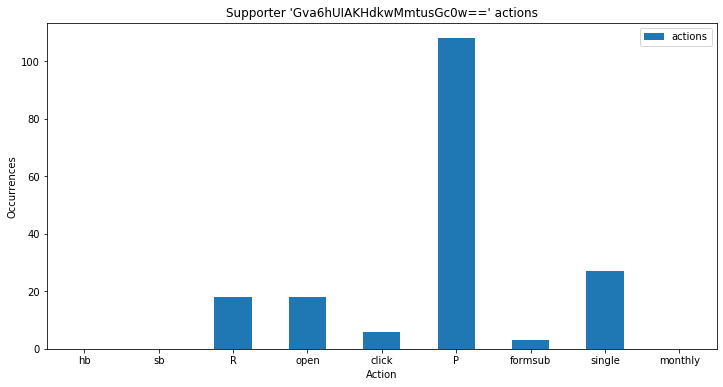

In [135]:
# supporter('Ivx8wT85KECZkArzVWMSmA==')    
# supporter('0fvs6pPg6h6ZkArzVWMSmA==')s
# supporter('hZftL2QRnjKZkArzVWMSmA==')
# supporter('7304B%2Bq6esmZkArzVWMSmA==')
# supporter('Kjo9p4wfWfS15xl1A%2FXc2A==')
# supporter('hZftL2QRnjKZkArzVWMSmA==')
# supporter('xW4XUujQsJyzFWMrHGgntg==')
# supporter('JsD4VHxMpDiq8wJuoPi1Lg==')
supporter('Gva6hUIAKHdkwMmtusGc0w==')   # Participated 108 times
# supporter('pYmmH5UlB3SZkArzVWMSmA==')
# supporter('suQ6hQpFqDELaZkArzVWMSmA==')

Which supporters did a FCS and FUR ?  

The FCS and FUR analysis is continued in another jupyter notebook file.